In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from partition_decode.plots import continuous_pairplot

In [2]:
df = pd.read_csv('./results/xor_forest_results.csv')

In [3]:
df['generalization_gap'] = df['test_01_error'] - df['train_01_error']
df['frac_activated'] = df['activated_regions'] / df['n_train_samples']

In [4]:
df.columns

Index(['model', 'rep', 'n_train_samples', 'n_estimators', 'bootstrap',
       'max_depth', 'n_jobs', 'train_01_error', 'test_01_error', 'irm_l2',
       'activated_regions', 'regions_l2', 'n_total_leaves',
       'generalization_gap', 'frac_activated'],
      dtype='object')

In [5]:
df.loc[df['max_depth'] == 'None', 'max_depth'] = '32' # set max depth
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except:
        pass

In [6]:
df = df.groupby(
    ['model', 'n_train_samples', 'n_estimators', 'max_depth'],
    as_index=False
).mean()

In [7]:
df.head(5)

,model,n_train_samples,n_estimators,max_depth,rep,bootstrap,n_jobs,train_01_error,test_01_error,irm_l2,activated_regions,regions_l2,n_total_leaves,generalization_gap,frac_activated
0,forest,4096.0,1.0,2.0,2.0,0.0,-1.0,0.471631,0.48016,3609.366047,4.0,3609.366047,4.0,0.008529,0.000977
1,forest,4096.0,1.0,3.0,2.0,0.0,-1.0,0.437402,0.45012,2978.211279,8.0,2978.211279,8.0,0.012718,0.001953
2,forest,4096.0,1.0,4.0,2.0,0.0,-1.0,0.420605,0.43134,2978.453934,13.6,2978.453934,13.6,0.010735,0.003320
3,forest,4096.0,1.0,6.0,2.0,0.0,-1.0,0.282471,0.30362,1451.975585,41.2,1451.975585,41.2,0.021149,0.010059
4,forest,4096.0,1.0,8.0,2.0,0.0,-1.0,0.267969,0.30272,1061.639359,72.6,1061.639359,72.6,0.034751,0.017725


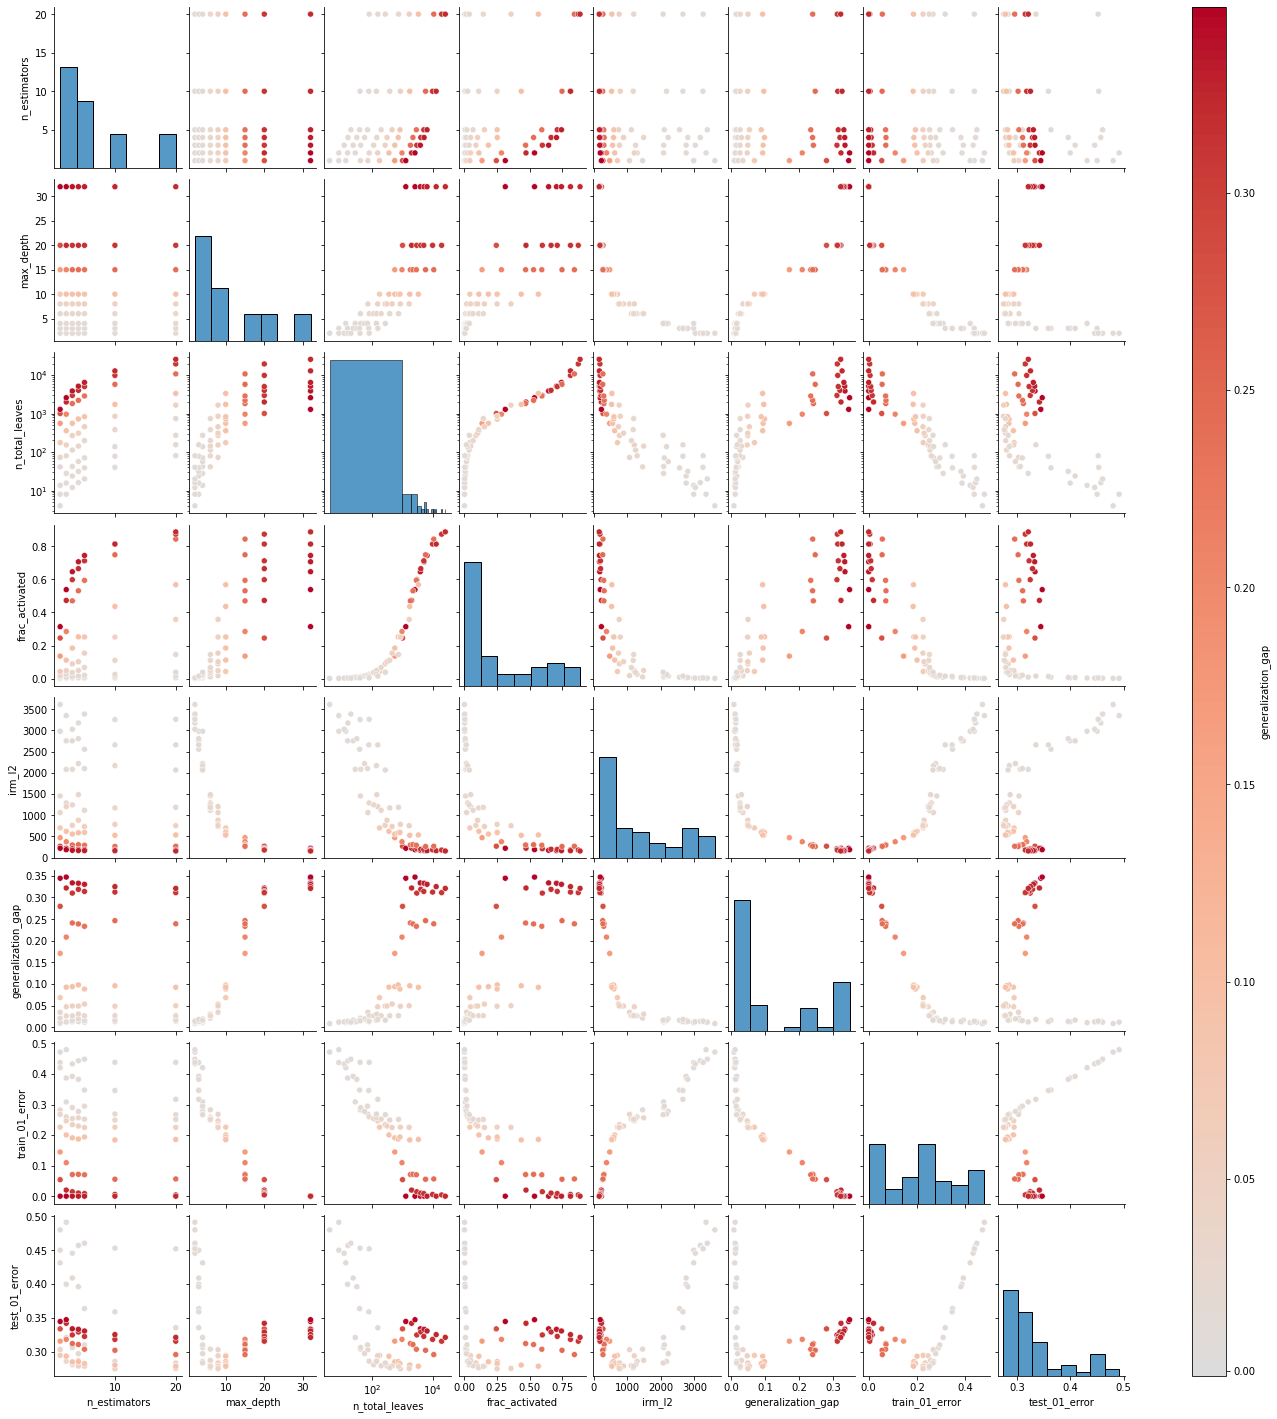

In [34]:
variables = [
    'n_estimators', 'max_depth', 'n_total_leaves', 'frac_activated', 'irm_l2',
    'generalization_gap',
    'train_01_error', 'test_01_error',
]
g = continuous_pairplot(
    df[variables].astype(float),
    hue='generalization_gap',
)
g.axes[2, 0].set_yscale('log')
g.axes[0, 2].set_xscale('log')
plt.show()